# 3- K En Yakın Komşu (K-Nearest Neighbor)

## TEORİ

**Tahminler gözlem benzerliğine göre yapılır.**

## UYGULAMA

### Verisetinin İncelenmesi ve Manipüle Edilmesi

* Kullanılan kütüphanlerin dahil edilmesi

In [43]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore', category = UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv"
diabetes = pd.read_csv(url)
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info() # veriseti bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().values.any() # verisetinde bos veya eksik degerler var mı?

False

In [5]:
df['Outcome'].value_counts() # outcome degerlerinin durumu

0    500
1    268
Name: Outcome, dtype: int64

/home/mrkizmaz/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


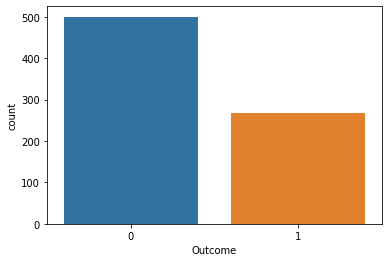

In [6]:
sns.countplot(df['Outcome']);

In [7]:
df.describe().T # verisetinin istatiksel bilgileri

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Model Kurulumu ve Tahminleme

In [8]:
X = df.drop(['Outcome'], axis = 1) # outcome dısındaki bagımsız degiskenler
y = df['Outcome'] # bagımlı degisken

# %20'i test, %80'i egitim seti
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
# model kurulumu
knn = KNeighborsClassifier().fit(X_train, y_train)
knn

KNeighborsClassifier()

In [11]:
?knn

Type:        KNeighborsClassifier
String form: KNeighborsClassifier()
File:        ~/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py
Docstring:  
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
      containing the weights.

algorithm : {'auto', 'b

In [12]:
score = accuracy_score(y_test, y_pred)
score # model dogruluk skoru

0.6623376623376623

In [13]:
y_pred = knn.predict(X_test) 
y_pred[0:10] # tahmin degerleri

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [14]:
# olasılık degerleri
knn.predict_proba(X_test)[0:10]

array([[0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6]])

In [19]:
# tahmin degerlerinin olaslıklarının dataframe dönüstürülmesi
predProba = pd.DataFrame(data = knn.predict_proba(X_test), columns = ['0 Prob', '1 Prob'])
predProba.head()

,0 Prob,1 Prob
0,0.6,0.4
1,0.6,0.4
2,1.0,0.0
3,0.4,0.6
4,0.6,0.4


In [20]:
print(classification_report(y_test, y_pred)) # sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



In [22]:
# caprazlama dogruluk skoru
cross_val_score(knn, X_test, y_test, cv = 10, scoring = 'accuracy').mean()

0.7145833333333333

In [23]:
print(f"Modelin dogruluk skoru: {score}")

Modelin dogruluk skoru: 0.6623376623376623


### Model Tuning

In [28]:
# optimum k degerinin bulunması
knn_params = {'n_neighbors': np.arange(1, 50)}
knn_cv = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)
knn_cv

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [30]:
knn_cv.best_params_ # optimum k degeri

{'n_neighbors': 12}

In [31]:
knn_cv.best_score_ # en iyi skor

0.7444738233738764

In [32]:
# optimum l degeriyle model kurulumu
knn_model = KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])
knn_model = knn_model.fit(X_train, y_train)
knn_model

KNeighborsClassifier(n_neighbors=12)

In [34]:
knn_model.score(X_test, y_test) # modelin anlamlılık degeri

0.7792207792207793

In [36]:
# tahinleme
from sklearn.metrics import mean_squared_error

y_pred = knn_model.predict(X_test)
dogSkor = accuracy_score(y_test, y_pred)
dogSkor # dogruluk skoru

0.7792207792207793

In [41]:
knn_model.predict_proba(X_test)[0:10] # olasılık degerleri

array([[0.5       , 0.5       ],
       [0.66666667, 0.33333333],
       [0.75      , 0.25      ],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.91666667, 0.08333333],
       [0.5       , 0.5       ],
       [0.41666667, 0.58333333],
       [0.5       , 0.5       ]])

In [42]:
print(f"Optimum k degeriyle olusturulan modelin dogruluk skoru: {dogSkor}")

Optimum k degeriyle olusturulan modelin dogruluk skoru: 0.7792207792207793


## SONUÇ

Bu projede, belirli değerler göz önünde bulundurularak bir kişinin hasta olup olmadığını tahmin etmek için K-En Yakın Komşu Sınıflandırıcı modeli kullanıldı.
* Modelin optimum dogruluk skoru: **0.7792207792207793**